# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [69]:
medical.shape

(1338, 8)

In [70]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [71]:
help(t.ppf)

Help on method ppf in module scipy.stats._distn_infrastructure:

ppf(q, *args, **kwds) method of scipy.stats._continuous_distns.t_gen instance
    Percent point function (inverse of `cdf`) at q of the given RV.
    
    Parameters
    ----------
    q : array_like
        lower tail probability
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    x : array_like
        quantile corresponding to the lower tail probability q.



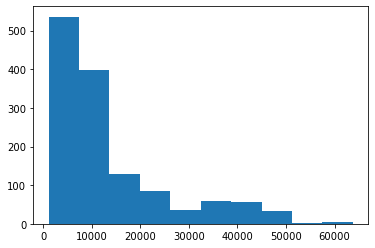

In [72]:
plt.hist(medical['charges'])
plt.show()

In [73]:
mean = np.mean(medical['charges'])
std = np.std(medical['charges'])
print("Mean: " + str(mean))
print("Standard Deviation: " + str(std))

#These statistics are not very indicitive of the data as the data is skewed heavily. With the standard deviation nearly
#being equal to the mean in a category where the value cannot be below 0, these cannot be used as a baseline to find a
#two-sided 95% confidence interval

Mean: 13270.422265141257
Standard Deviation: 12105.484975561605


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ There is a large enough sample size to justify the data. The frequentist test needs to be a confidence interval.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ An appropriate confidence interval would be one-sided because of how skewed it is.

In [74]:
#mean minus critical value and alpha = 0.95 NOT 0.975


In [75]:
n = medical['charges'].count()
t_critical = t.ppf(0.95, n-1)
print(t_critical, n)

1.6459941145571317 1338


In [76]:
margin_of_error = t_critical * (std/np.sqrt(n))
print("Margin of error is " + str(margin_of_error))

confidence_interval = (mean - margin_of_error)
print("Confidence interval of 95% is: " + str(confidence_interval))

#Confidence interval of 12725.7 is below that of the sample mean so the administrator should not be concerned.

Margin of error is 544.7314053390934
Confidence interval of 95% is: 12725.690859802164


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is that people with insurance are not charged a different amount from those without. The alternate hypothesis is that the two groups are charged a different amount. There is an assumption that the variance of the two groups is equal.

#list of charges that are insured and list of charges not insured. n0 would be list of charges uninsured. n1 would be list of charges insured. x-bar0 would be mean of charges that are uninsured. s = standard deviation

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [77]:
ins_claim = medical[medical['insuranceclaim'] == 1]
no_ins_claim = medical[medical['insuranceclaim'] == 0]

n1 = ins_claim['charges'].count()
n0 = no_ins_claim['charges'].count()

ins_mean = np.mean(ins_claim['charges'])
no_ins_mean = np.mean(no_ins_claim['charges'])

s1 = np.std(ins_claim['charges'])
s0 = np.std(no_ins_claim['charges'])
print(n1, n0, ins_mean, no_ins_mean, s1, s0)

783 555 16423.928276537663 8821.421892306294 14036.956250260411 6440.699841605233


In [78]:
top = (n0-1)*s0**2+(n1-1)*s1**2
bottom = n0 + n1 - 2

pooled_std = np.sqrt(top/bottom)
#pooled_std = np.sqrt(((n0-1)*s0**2+(n1-1)*s1**2))
pooled_std

11512.282899205744

In [79]:
t_bottom = pooled_std*np.sqrt((1/n0)+(1/n1))

t_value = (ins_mean - no_ins_mean)/t_bottom

t_value

11.901306943555385

In [89]:
from scipy.stats import ttest_ind_from_stats
help(ttest_ind_from_stats)

Help on function ttest_ind_from_stats in module scipy.stats.stats:

ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True, alternative='two-sided')
    T-test for means of two independent samples from descriptive statistics.
    
    This is a two-sided test for the null hypothesis that two independent
    samples have identical average (expected) values.
    
    Parameters
    ----------
    mean1 : array_like
        The mean(s) of sample 1.
    std1 : array_like
        The standard deviation(s) of sample 1.
    nobs1 : array_like
        The number(s) of observations of sample 1.
    mean2 : array_like
        The mean(s) of sample 2.
    std2 : array_like
        The standard deviations(s) of sample 2.
    nobs2 : array_like
        The number(s) of observations of sample 2.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Wel

In [91]:
t_auto = ttest_ind_from_stats(no_ins_mean, s0, n0, ins_mean, s1, n1)

t_auto

Ttest_indResult(statistic=-11.901306943555387, pvalue=4.090550214373679e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ There is no equivalent one because z-test is used for population data when parameters are known, not sample sizes.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test